In [1]:
# Load pacakges ----
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.display import HTML
from IPython.display import Markdown as md
from IPython.core.display import HTML as Center
from config import marker, qof_measure_marker, start_date, end_date, demographics, codelist_path
from IPython.display import Image, display

from utilities import *
%matplotlib inline


In [2]:
display(
    md(f"## Changes and variation in {marker}"),
    md(f"### Indicator: {qof_measure_marker} (Version: 46.0)"),
    md(f"### Timeframe: {start_date} and {end_date}")
    )

## Changes and variation in QOF Blood Pressure targets

### Indicator: BP002 (Version: 46.0)

### Timeframe: 2019-09-01 and 2022-03-31

# Content

<ul id="docNav">

<li> <a href="#what">What it is</a>
<li> <a href="#why">Why it matters</a>
<li> <a href="#business_rules">Business rules</a>
    <ul>
        <li> <a href="#business_rules_bp002">Indicator BP002</a>
            <ul>
                 <li> <a href="#bp002_denominator">Denominator</a>
                 <li> <a href="#bp002_numerator">Numerator</a>
            </ul>
    </ul>
<li> <a href="#methods">Methods</a>
<li> <a href="#results">Results</a>
    <ul>
        <li> <a href="#results_bp002">Indicator BP002</a>
    </ul>
<li> <a href="#discussion">Discussion</a>

</ul>

<a id="what"></a>
# What it is 

The Quality and Outcomes Framework (QOF) outlines one indicator that focus on blood pressure (BP002). 
We aim to use OpenSAFELY to quantify the extent to which this indicator was disrupted during the pandemic.


<a id="why"></a>
# Why it matters

General practice has been disrupted by the pandemic in many clinical areas (e.g., [Curtis et al., 2021](https://bjgp.org/content/72/714/e63); [Williams et al., 2020](https://www.nature.com/articles/s41586-020-2521-4)). 
We aim to assess the impact of the pandemic on the routine management of blood pressure. 
High blood pressure is one of the leading risk factors for several diseases (e.g., cardiovascular disease, stroke) worldwide. 
Research suggests that delays in the management of high blood pressure are associated with worse clinical outcomes, for example acute cardiovascular events, or death ([Xu et al., 2015](https://www.bmj.com/content/350/bmj.h158)).

<a id="business_rules"></a>

# Business rules

The denominator and numerator rules for BP002 (Version: 46.0) are outlined below.
Prevalence data is not available for the blood pressure indicator. 
More details can be found [here](https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/quality-and-outcomes-framework-qof/quality-and-outcome-framework-qof-business-rules/qof-business-rules-v46.0-2021-2022-baseline-release).
Dashboards presenting the annual targets of all QOF indicators published by NHSD are available [here](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/general-practice-data-hub/quality-outcomes-framework-qof).

<a id="business_rules_bp002"></a>

## Indicator BP002

<a id="bp002_denominator"></a>

### Denominator

| Rule number | Rule | Action if true | Action if false | Rule description or comments |
|:---|:---|:---|:---|:---| 
| 1 | If `PAT_AGE` < 45 | Reject | Next rule | Reject patients from the specified population who are aged less than 45 years old. Pass all remaining patients to the next rule. |
| 2 | If `BP_DAT` > (`PPED` – 5 years) | Select | Next rule | Select patients passed to this rule who had their blood pressure recorded in the 5 year period leading up to and including the payment period end date. Pass all remaining patients to the next rule. |
| 3 | If `BPDEC_DAT` > (`PPED` – 5 years)  | Reject | Next rule | Reject patients passed to this rule chose not to have their blood pressure recorded in the 5 year period leading up to and including the payment period end date. Pass all remaining patients to the next rule. |
| 4 | If `REG_DAT` > (`PPED` – 3 months) | Reject | Select | Reject patients passed to this rule who registered with the GP practice in the 3 month period leading up to and including the payment period end date. Select the remaining patients. |

<a id="bp002_numerator"></a>

### Numerator

| Rule number | Rule | Action if true | Action if false | Rule description or comments |
|:---|:---|:---|:---|:---| 
| 1 | If `BP_DAT` > (`PPED` – 5 years) | Select | Reject | Select patients from the denominator who had their blood pressure recorded in the 5 year period leading up to and including the payment period end date. Reject the remaining patients. |


<a id="methods"></a>
# Methods

In [3]:
display(
    
    md(f"Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed coding activity related to {marker} (Indicator: {qof_measure_marker}) between {start_date} and {end_date}. The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/)."),
    md("For each month within the study period, we have calculated the percentage of registered patients above 45 years that had their blood pressure recorded in the 5 year period leading up to the month of reporting."),
    md(f"All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely/blood-pressure-qof)")
)

Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed coding activity related to QOF Blood Pressure targets (Indicator: BP002) between 2019-09-01 and 2022-03-31. The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/).

For each month within the study period, we have calculated the percentage of registered patients above 45 years that had their blood pressure recorded in the 5 year period leading up to the month of reporting.

All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely/blood-pressure-qof)

<a id="results"></a>
# Results

<a id="results_bp002"></a>
## Indicator BP002

In [25]:
codelist = pd.read_csv(f'../{codelist_path}')

image_paths = {d: f'../output/plot_{d}.png' for d in demographics}
image_paths['total'] = '../output/plot_total.png'

In [5]:
md(f"## Percentage of patients above 45 years that had their blood pressure recorded in the last 5 years")

## Percentage of patients above 45 years that had their blood pressure recorded in the last 5 years

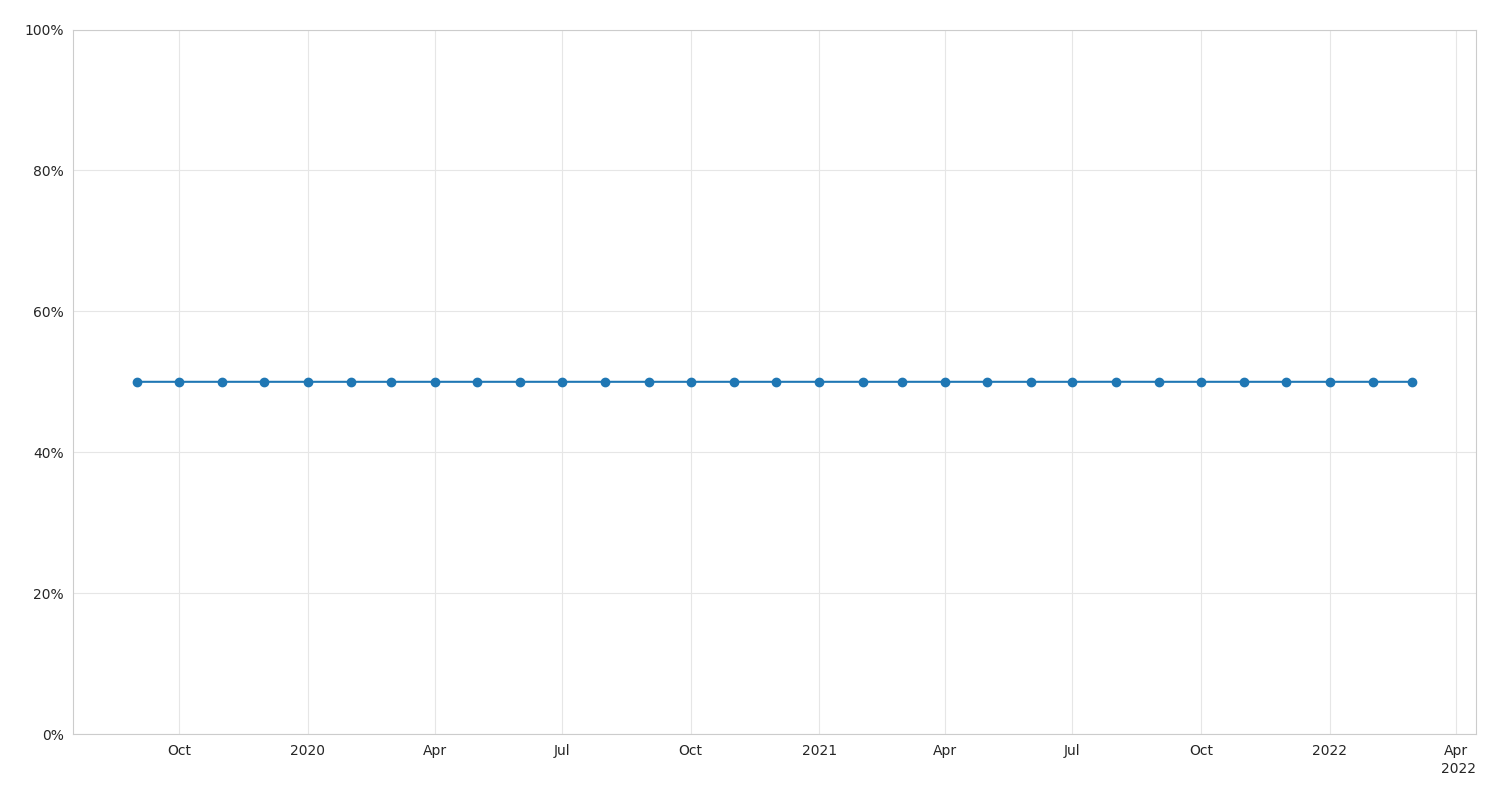

In [6]:
Image(filename=image_paths['total'])

### Totals number of recorded events

The table below shows the top 5 recorded events across the study period.
Note that this table currently only contains one code per patient per month.
Therefore some counts may not be accurate.
This issue will be fixed in a future update of this report.

In [7]:
child_table = pd.read_csv('../output/child_code_table.csv')
child_table

,code,Events,Events (thousands),Description
0,852301000000109,145.0,0.145,Minimum mean blood pressure
1,163037000,145.0,0.145,On examination - blood pressure labile
2,271650006,143.0,0.143,Diastolic blood pressure
3,163024003,139.0,0.139,On examination - blood pressure borderline low
4,163020007,138.0,0.138,On examination - blood pressure reading


In [8]:
md("### Total Number by GP Practice")

### Total Number by GP Practice

In [9]:
practice_table = pd.read_csv('../output/rate_table_practice.csv', parse_dates=['date']).sort_values(by='date')
percentage_practices = get_percentage_practices(practice_table)
md(f"Percentage of practices with a recording of a code within the codelist during the study period: {percentage_practices}%")

Percentage of practices with a recording of a code within the codelist during the study period: 91.67%

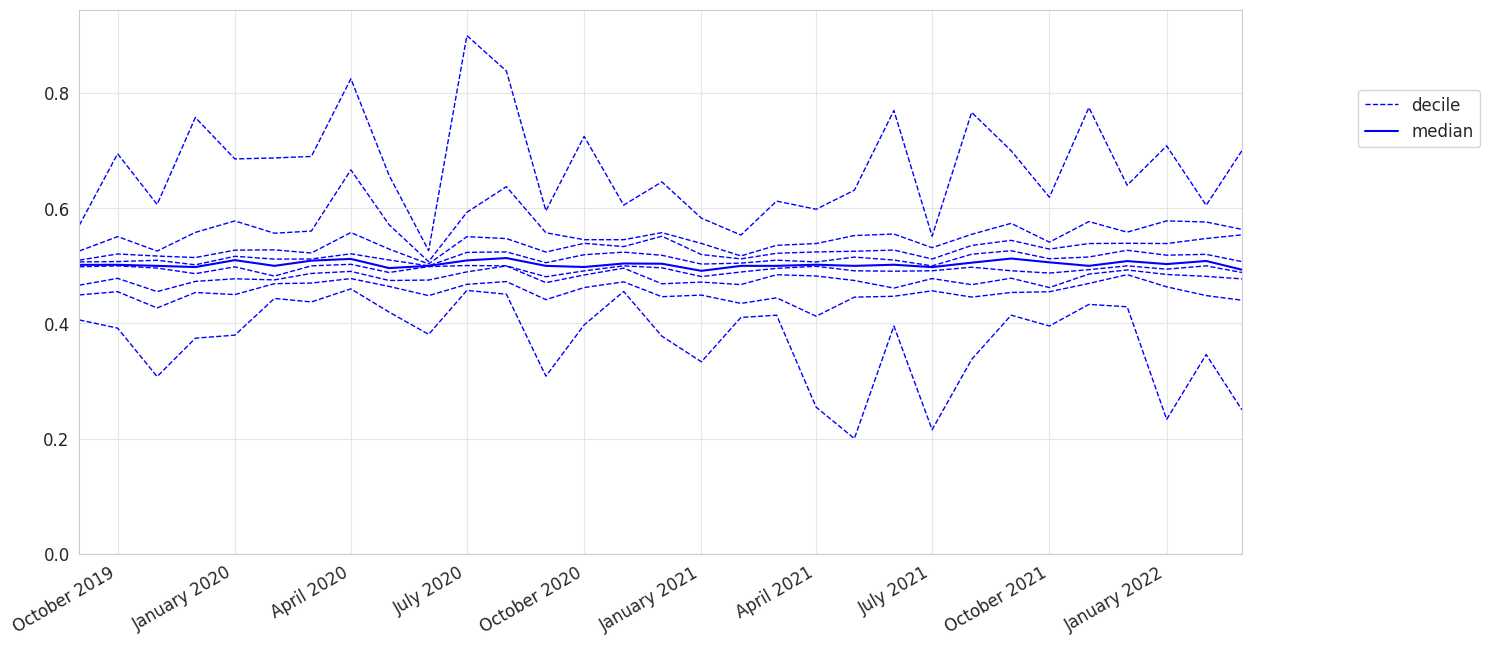

In [10]:
Image(filename='../output/decile_chart.png')

In [11]:
md(f"### Breakdown of {marker} by '{demographics[0]}'")

### Breakdown of QOF Blood Pressure targets by 'sex'

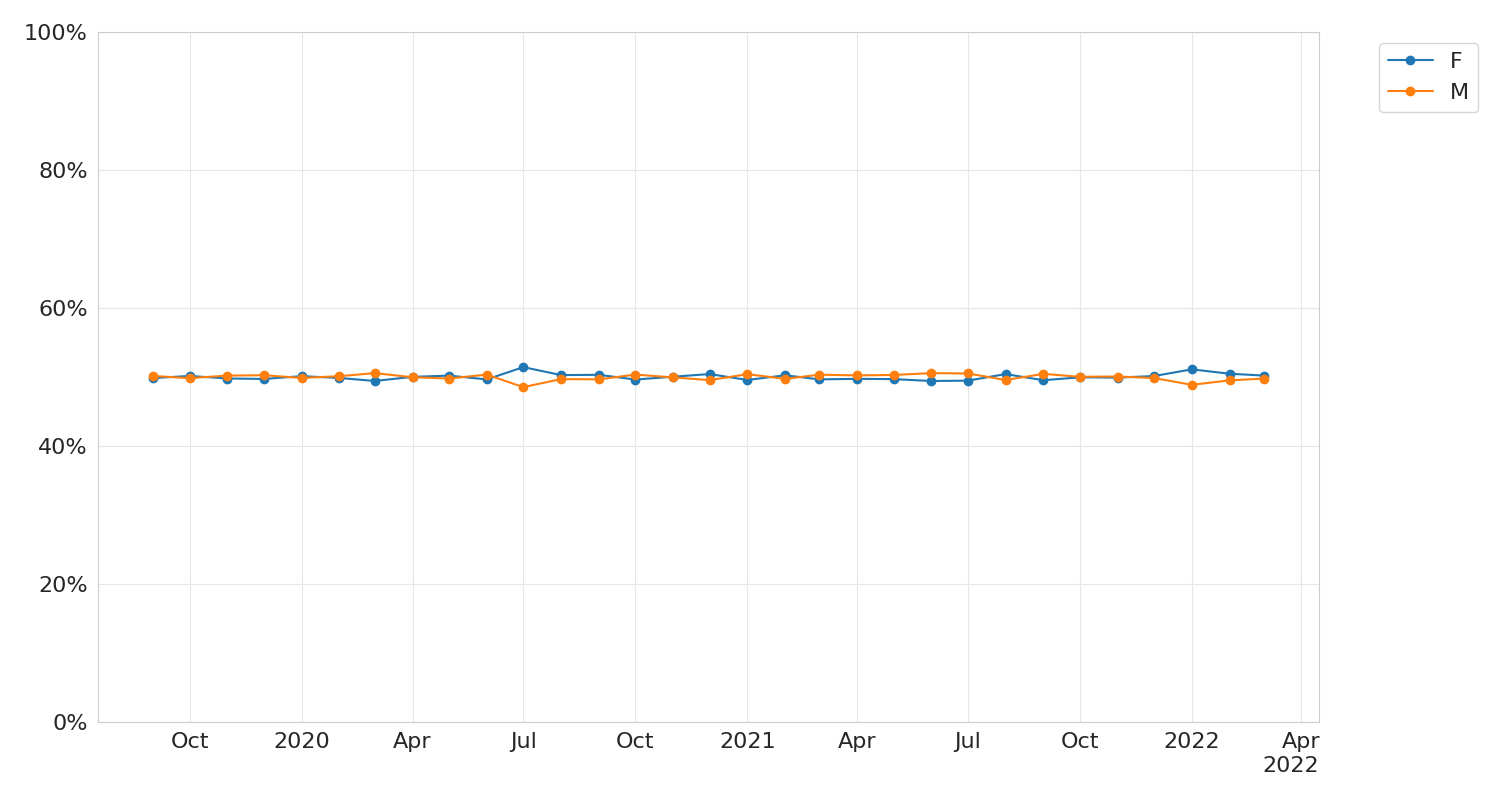

In [12]:
Image(filename=image_paths[demographics[0]])

In [13]:
md(f"### Breakdown of {marker} by '{demographics[1]}'")

### Breakdown of QOF Blood Pressure targets by 'age_band'

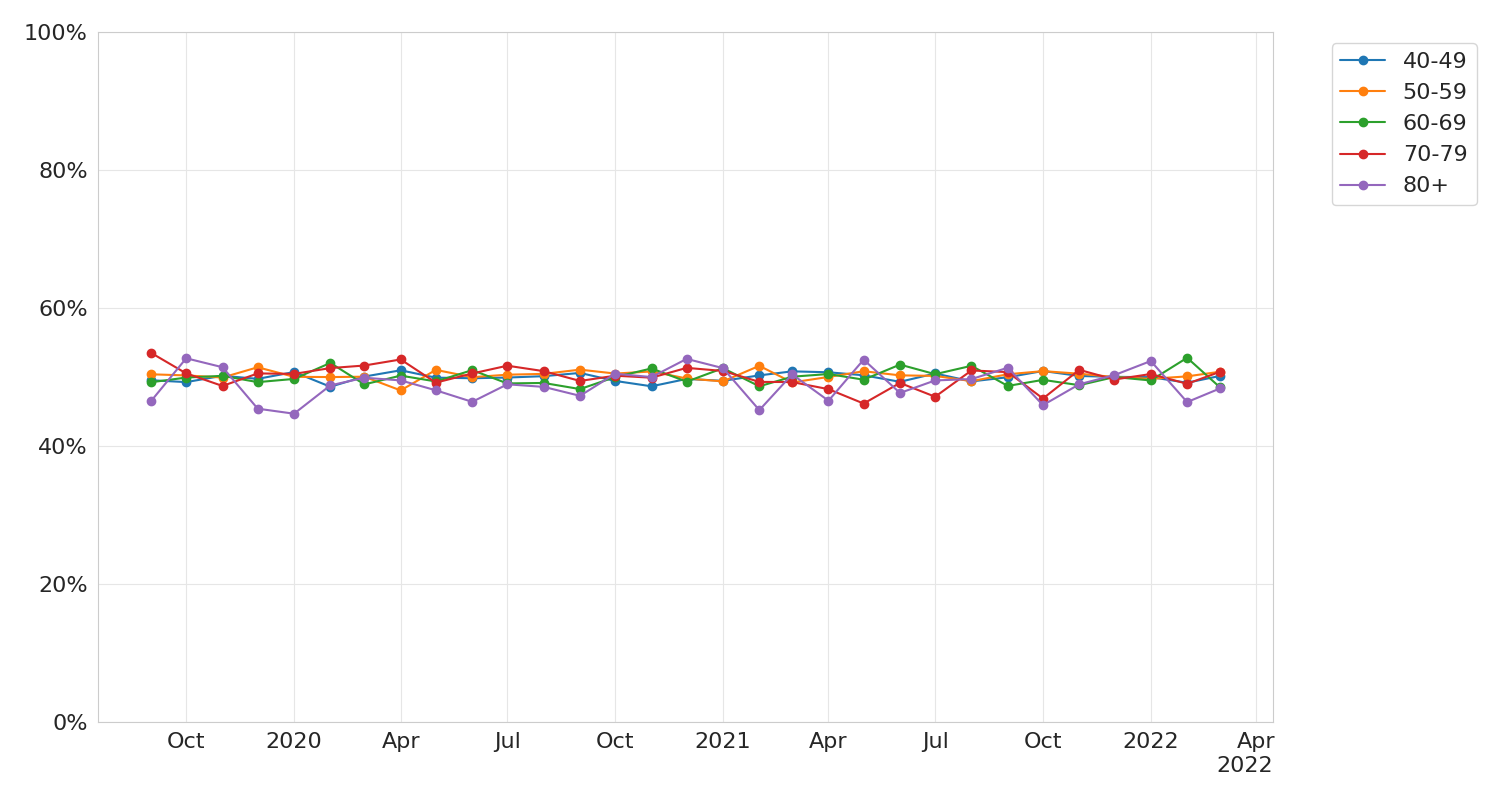

In [14]:
Image(filename=image_paths[demographics[1]])

In [15]:
md(f"### Breakdown of {marker} by '{demographics[2]}'")

### Breakdown of QOF Blood Pressure targets by 'region'

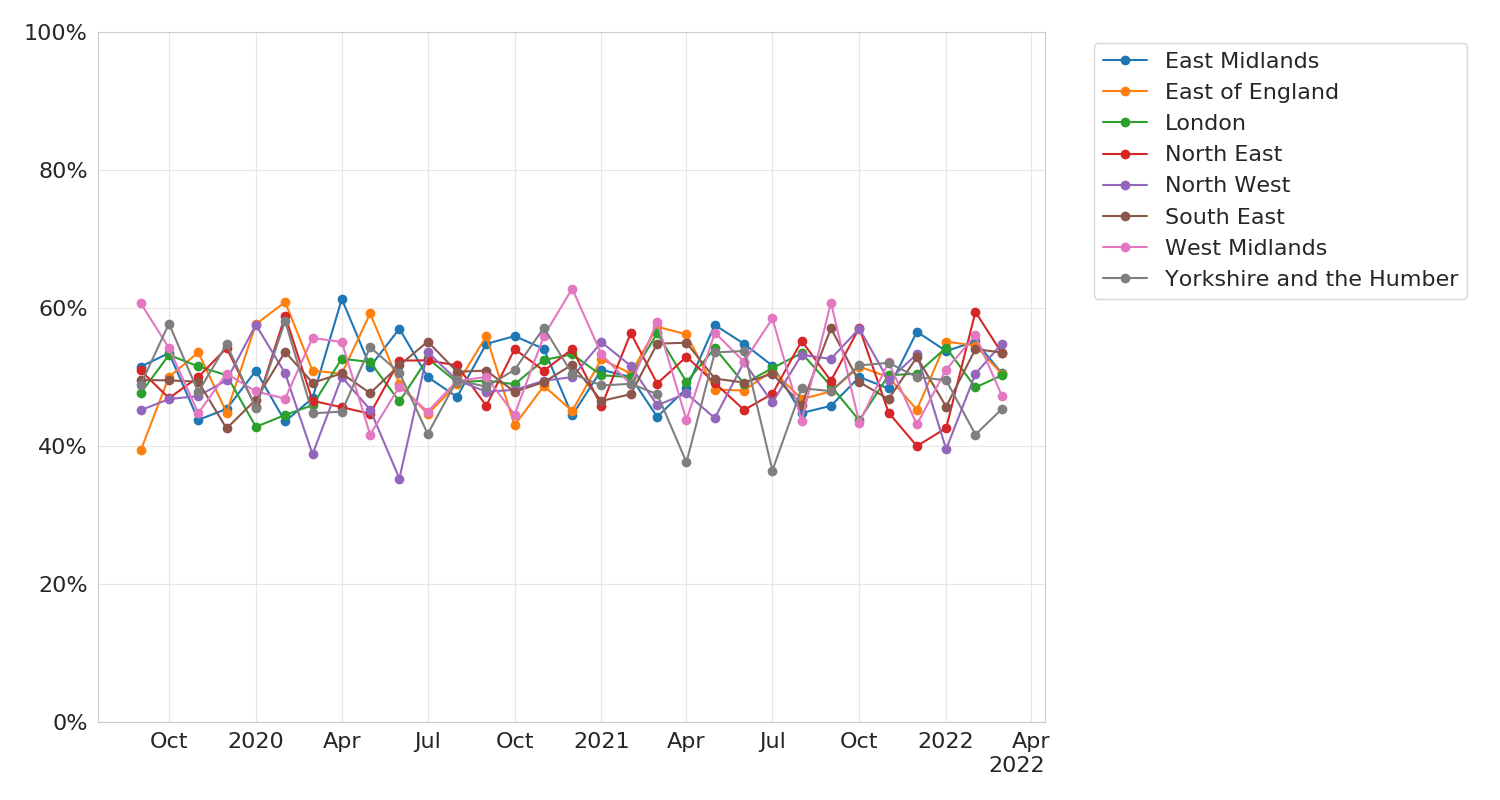

In [16]:
Image(filename=image_paths[demographics[2]])

In [17]:
md(f"### Breakdown of {marker} by '{demographics[3]}'") 

### Breakdown of QOF Blood Pressure targets by 'imd'

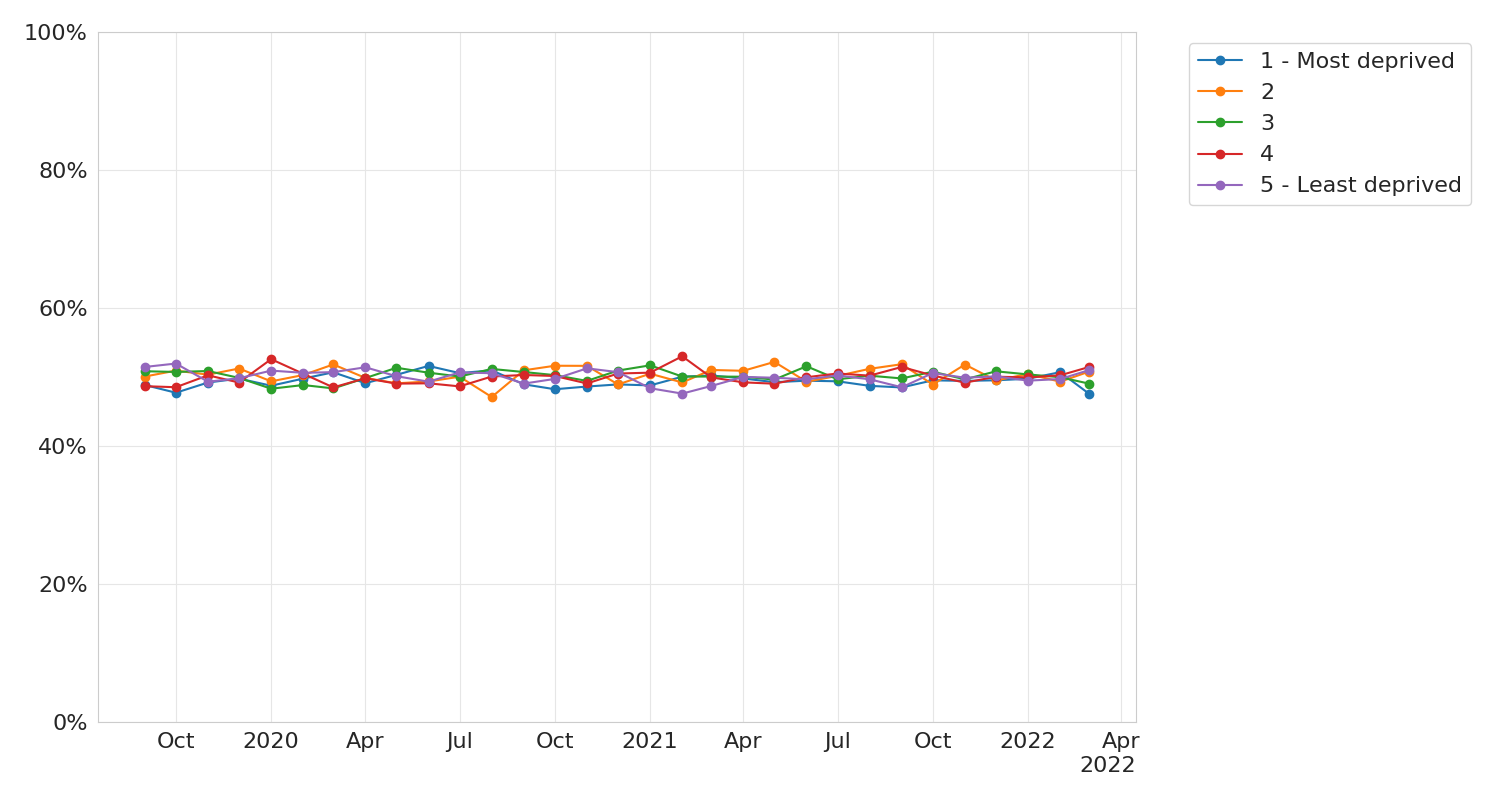

In [18]:
Image(filename=image_paths[demographics[3]])

In [19]:
md(f"### Breakdown of {marker} by '{demographics[4]}'")  

### Breakdown of QOF Blood Pressure targets by 'ethnicity'

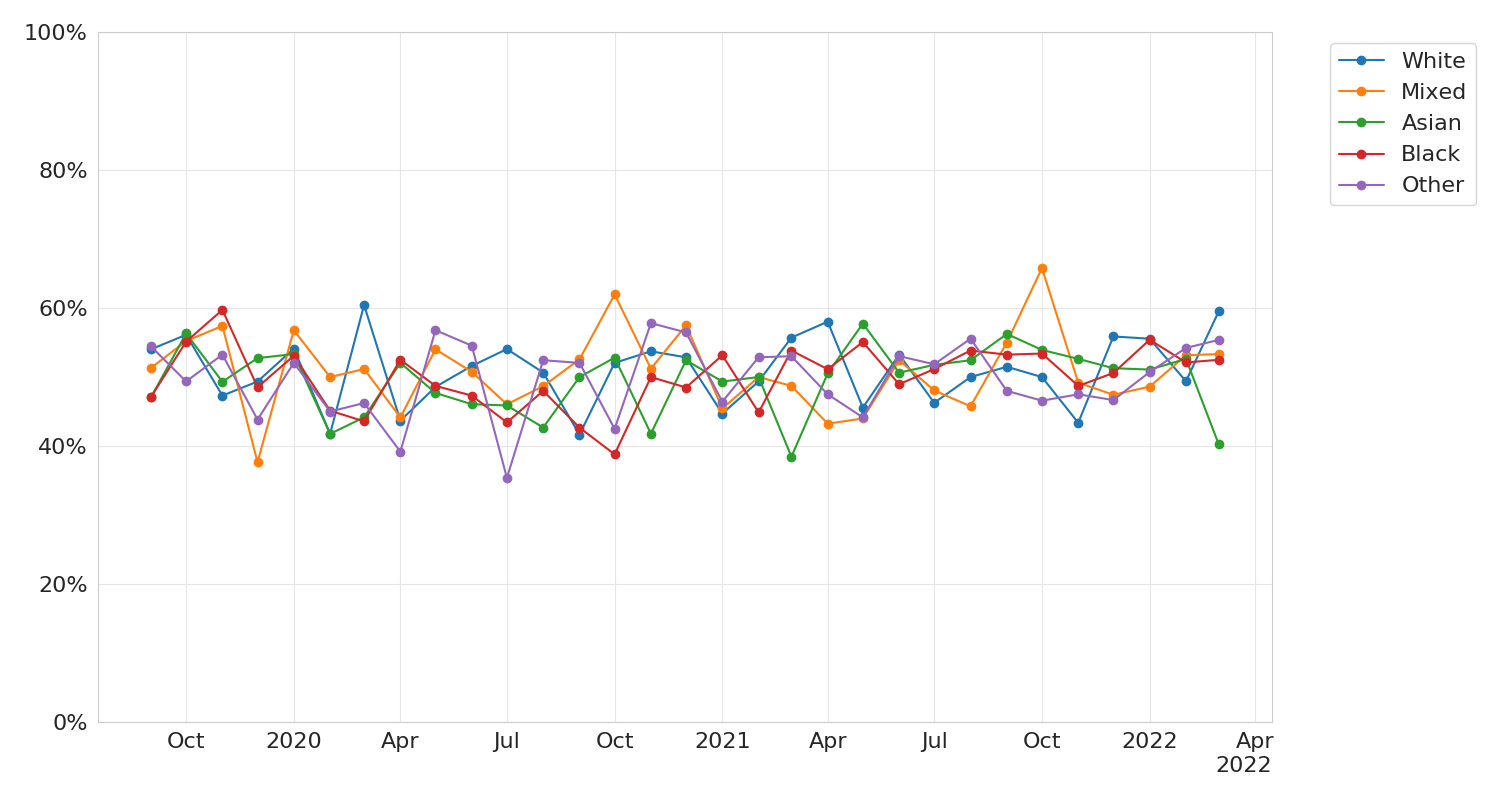

In [20]:
Image(filename=image_paths[demographics[4]])

In [21]:
md(f"### Breakdown of {marker} by '{demographics[5]}'")

### Breakdown of QOF Blood Pressure targets by 'learning_disability'

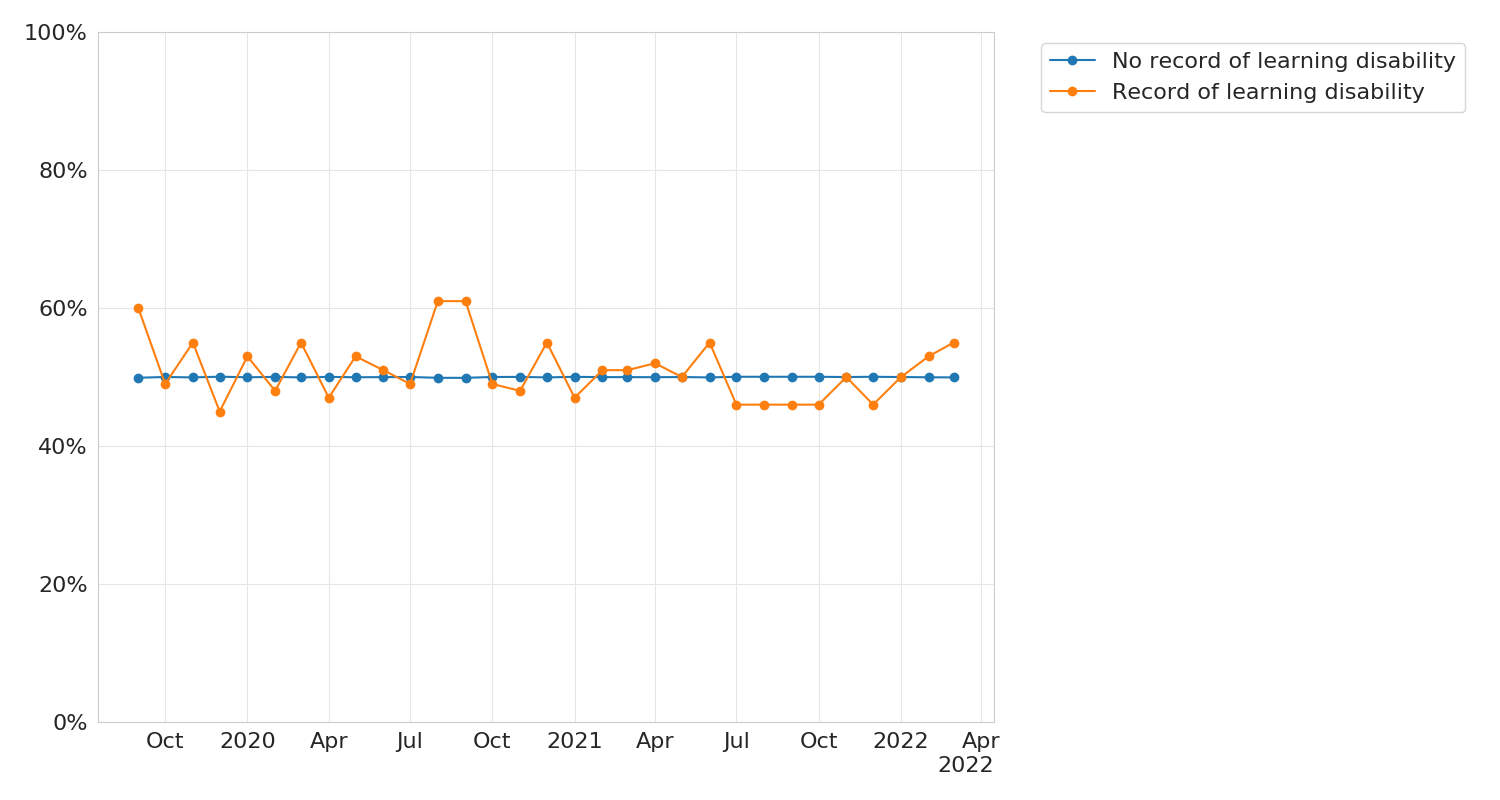

In [22]:
display(Image(filename=image_paths[demographics[5]]))

In [23]:
md(f"### Breakdown of {marker} by '{demographics[6]}'")

### Breakdown of QOF Blood Pressure targets by 'care_home_status'

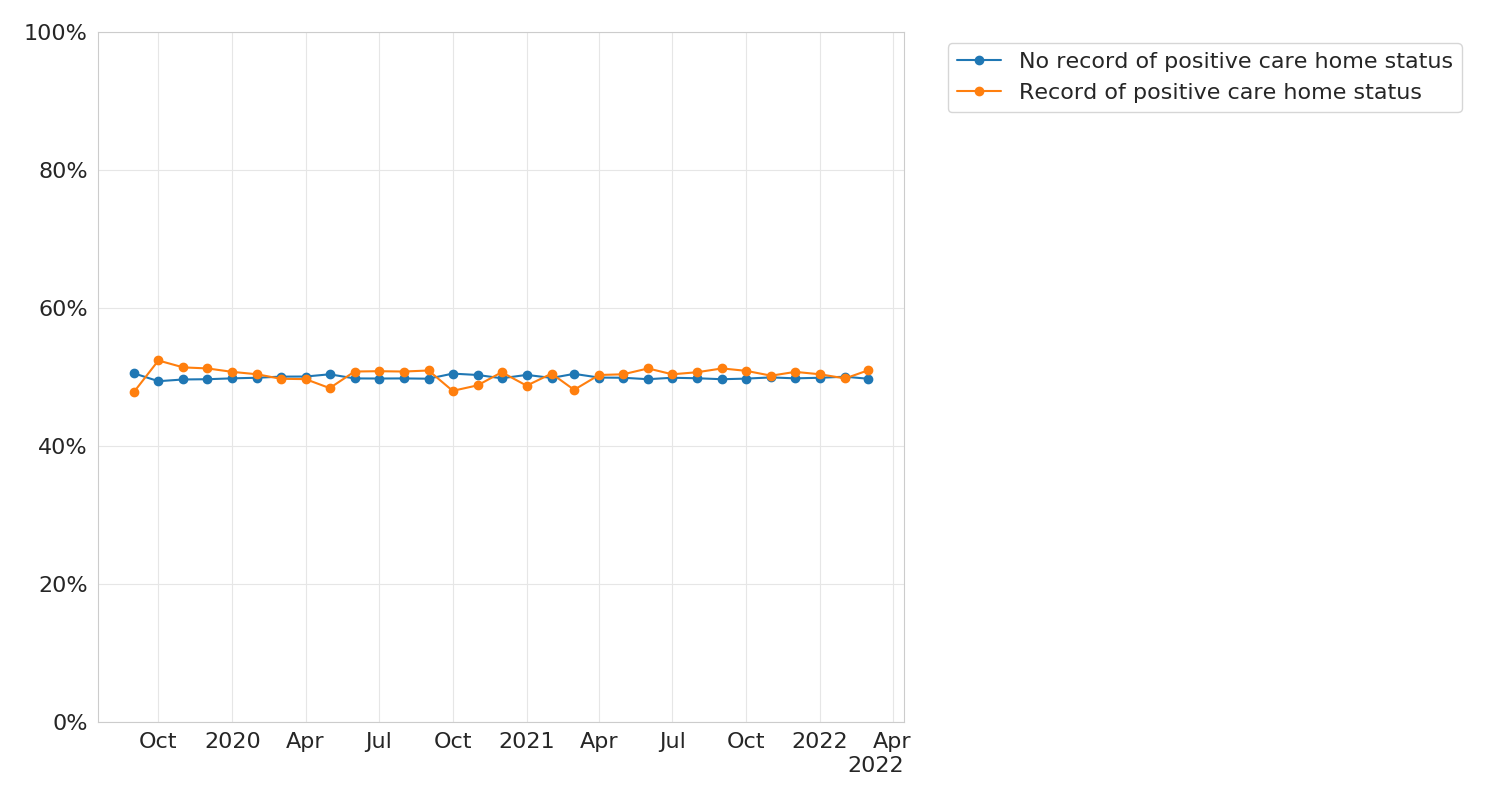

In [24]:
Image(filename=image_paths[demographics[6]]) 